<a href="https://colab.research.google.com/github/martin-dj/casa0018/blob/main/Week3/CASA0018_3_3_Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training with a Larger Dataset - Cats and Dogs

> This lab is based on one of the TensorFlow ‘Zero to Hero’ tutorials to create a model to recognize images of cats and dogs based on a previous Kaggle competition. There is a supporting video at: https://youtu.be/nq7_ZYJPWf0?t=141 and the video uses the Colab notebook here:
https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab6-Cats-v-Dogs.ipynb


Overfitting can be a problem when training on a small dataset. Overfitting means the network 'learns' the training dataset and therefore performs poorly when subjected to unseen data. In this lab you'll look at a real dataset and see the effects of overfitting and how to combat it.

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

5184
5000


In [4]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

4147
4000
1037
1000


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,641 (33.42 MB)

 Trainable params: 8,760,641 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    target_size=(200, 200))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='binary',
                                                              batch_size=64,
                                                              target_size=(200, 200))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 8147 images belonging to 2 classes.
Found 2037 images belonging to 2 classes.


In [9]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, validation_steps=8)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - acc: 0.5697 - loss: 0.7766 - val_acc: 0.7153 - val_loss: 0.5579
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - acc: 0.7376 - loss: 0.5267 - val_acc: 0.6976 - val_loss: 0.5841
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 180ms/step - acc: 0.7807 - loss: 0.4698 - val_acc: 0.7619 - val_loss: 0.5106
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - acc: 0.8151 - loss: 0.4057 - val_acc: 0.7585 - val_loss: 0.5050
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - acc: 0.8440 - loss: 0.3588 - val_acc: 0.7889 - val_loss: 0.4898
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - acc: 0.8771 - loss: 0.2878 - val_acc: 0.7820 - val_loss: 0.5305
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 177ms/step - acc: 0.9036 - loss: 0.2300 - val_acc: 0.7820 - val_loss: 0.5986
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - acc: 0.9332 - loss: 0.1681 - val_acc: 0.7806 - val_loss: 0.6450
Epoch 9/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s

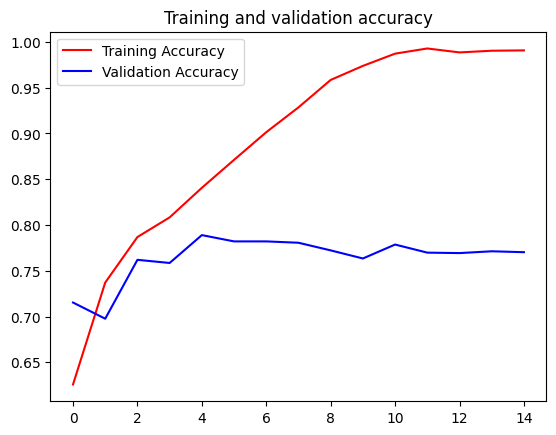

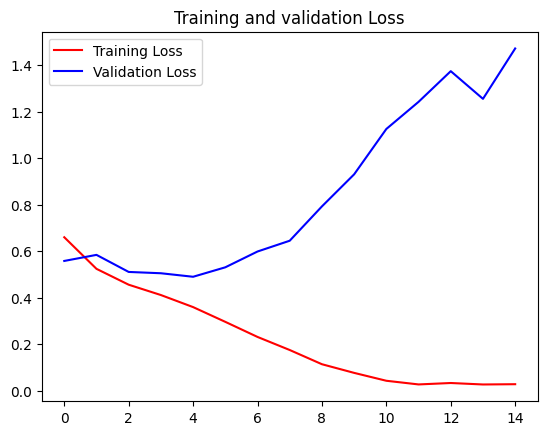

<Figure size 640x480 with 0 Axes>

In [10]:
%matplotlib inline

#import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

If you inspect the Accuracy and Loss curves you will probably notice evidence of *overfitting* (where the network learns the training data set). You will notice that the training accuracy is too high and significantly better than the validation accuracy. And if you look at the loss curves the validation loss is increasing as the training progresses.
To combat this overfitting we can adopt a number of measures, particularly data augmentation (to diversify the training data set) and regularisation (randomly dropping some connections for each training iteration). This should reduce the overfitting and increase the ability of the network to *generalise* (accurately classify *unseen* data).

Modify the network archicture as follows:

In [11]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,333,505 (39.42 MB)

 Trainable params: 10,333,505 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

Now we will add some data augmentation

In [12]:
train_datagen_2 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator_2 = train_datagen_2.flow_from_directory(TRAINING_DIR, class_mode='binary', batch_size=64, target_size=(200, 200))

Found 8147 images belonging to 2 classes.


Now train the new model.

In [13]:
history_2 = model_2.fit(train_generator_2, epochs=15, validation_data=validation_generator, validation_steps=8)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 112s 749ms/step - acc: 0.4992 - loss: 5.9366 - val_acc: 0.6058 - val_loss: 0.6599
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 90s 669ms/step - acc: 0.5862 - loss: 0.6645 - val_acc: 0.6402 - val_loss: 0.6124
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 90s 671ms/step - acc: 0.6474 - loss: 0.6336 - val_acc: 0.6613 - val_loss: 0.6565
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 89s 665ms/step - acc: 0.6899 - loss: 0.5871 - val_acc: 0.6726 - val_loss: 0.6687
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 143s 662ms/step - acc: 0.7185 - loss: 0.5567 - val_acc: 0.6495 - val_loss: 0.6789
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 90s 670ms/step - acc: 0.7074 - loss: 0.5622 - val_acc: 0.6819 - val_loss: 0.6414
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 91s 680ms/step - acc: 0.7184 - loss: 0.5493 - val_acc: 0.6932 - val_loss: 0.6176
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 90s 669ms/step - acc: 0.7341 - loss: 0.5363 - val_acc: 0.7241 - val_loss: 0.5519
Epoch 9/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9

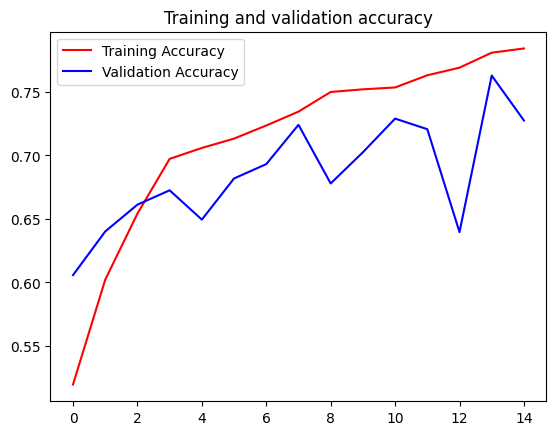

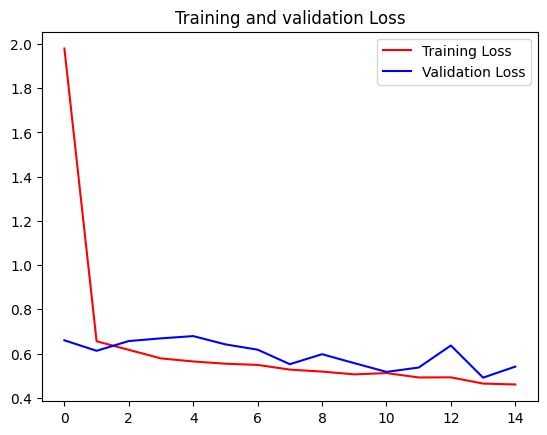

<Figure size 640x480 with 0 Axes>

In [14]:
%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_2.history['acc']
val_acc=history_2.history['val_acc']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [15]:
model_2.save("/tmp/model.keras")

In [16]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 10023.jpg to 10023.jpg
Saving 10162.jpg to 10162.jpg
Saving 10472.jpg to 10472.jpg
Saving 10481.jpg to 10481.jpg
Saving 10523.jpg to 10523.jpg
Saving 10526.jpg to 10526.jpg
Saving 12415.jpg to 12415.jpg
Saving 12416.jpg to 12416.jpg
Saving 12441.jpg to 12441.jpg
Saving 12462.jpg to 12462.jpg
Saving 12478.jpg to 12478.jpg
Saving 12485.jpg to 12485.jpg
Saving cat-3.jpg to cat-3.jpg
Saving cat-4.jpg to cat-4.jpg
Saving cat-5.jpg to cat-5.jpg
Saving cat-6.jpg to cat-6.jpg
Saving cat-7.jpg to cat-7.jpg
Saving cat-8.jpg to cat-8.jpg
Saving cat-9.jpg to cat-9.jpg
Saving cat-10.jpg to cat-10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
[1.]
[[1.]]
10023.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1.]
[[1.]]
10162.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.]
[[0.]]
10472.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.]
[[0.]]
10481.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.]
[[1.]]
10523.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.]
[[0.]]
10